# **Traditional Techniques for Model Interpretation**

**1. Exploratory analysis and visualization techniques**


* Dimensionality Reduction: Principal Component Analysis (PCA), Self-organizing maps (SOM), Latent Semantic Indexing

* Manifold Learning: t-Distributed Stochastic Neighbor Embedding (t-SNE)

* Variational Autoencoders: An automated generative approach using variational autoencoders (VAE)

* Clustering: Hierarchical Clustering


**2. Model performance evaluation metrics**
* Classification models: Precision, Recall, Accuracy, ROC curve and the AUC  
* Regression models: The coefficient of determination (R-square), root mean-square error, mean absolute error 

# **Limitations of Traditional Techniques and Motivation for Better Model Interpretation**

The techniques we discussed in the previous techniques are definitely helpful in trying to understand more about our data, features as well as which models might be effective. However, they are quite limiting in terms of trying to discern human-interpretable ways of how a model works. In any data science problem, we usually build a model on a stationary dataset and get our objective function (optimized loss function) which is usually deployed when it meets certain criteria based on model performance and business requirements. Usually we leverage the above techniques of exploratory analysis and evaluation metrics for deciding the overall model performance on our data. However, in the real-world, a model’s performance often decreases and plateaus over time after deployment due to variability in data features, added constraints and noise. This might include things like changes in the environment, changes in features as well as added constraints. Hence simply re-training a model on the same feature set will not be sufficient and we need to constantly check for how important features are in deciding model predictions and how well they might be working on new data points.


Besides, often bias exists in models due to the nature of data we are dealing with like in a rare-class prediction problem (fraud or intrusion detection). Metrics don’t help us justify the true story of a model’s prediction decisions. Also these traditional forms of model interpretation might be easy for a data scientist to understand but since they are inherently theoretical and often mathematical, there is a substantial gap in trying to explain these to (non-technical) business stakeholders and trying to decide the success criteria of a project based on these metrics alone. Just telling the business, “I have a model with 90% accuracy” is not sufficient information for them to start trusting the model when deployed in the real world. We need human-interpretable interpretations (HII) of a model’s decision policies which could be explained with proper and intuitive inputs and outputs. This would enable insightful information to be easily shared with peers (analysts, managers, data scientists, data engineers). Using such forms of explanations, which could be explained based on inputs and outputs, might help facilitate better communication and collaboration, enabling businesses to make more confident decision

# **Alternative Model Interpretation Techniques**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,plot_roc_curve
from sklearn.model_selection import  train_test_split, cross_validate

pd.set_option('max_columns', None)

# 1. Using Interpretable Models

Linear Regression, Logistic Regression, Tree-based Models rule-fits. And even models like k-nearest neighbors and Naive Bayes are better.

# 2. Feature Importances

Feature importance is generic term for the degree to which a predictive model relies on a particular feature. Typically, a feature’s importance is the increase in the model’s prediction error after we permuted the feature’s values. Frameworks like Skater compute this based on an information theoretic criteria, measuring the entropy in the change of predictions, given a perturbation of a given feature. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
data = iris["data"]
target = iris["target"]
data = pd.DataFrame(data, columns=iris["feature_names"])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = pd.Series(target).map({0: 0, 1: 0, 2: 1})

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=17)
rfc.fit(data, target)

tree_list = rfc.estimators_

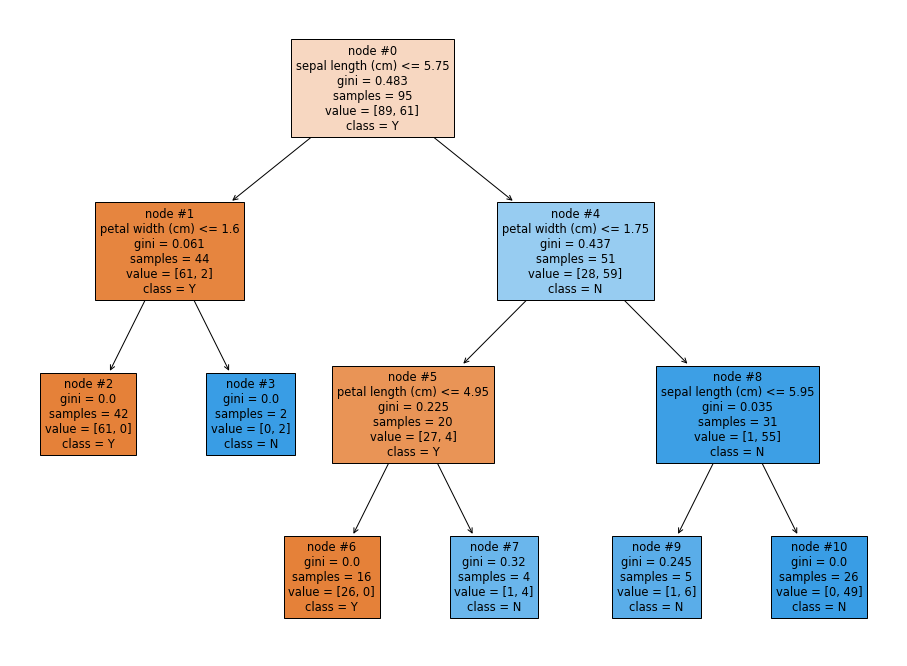

In [5]:
from sklearn import tree

plt.figure(figsize=(16, 12))
tree.plot_tree(
    tree_list[0],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
);

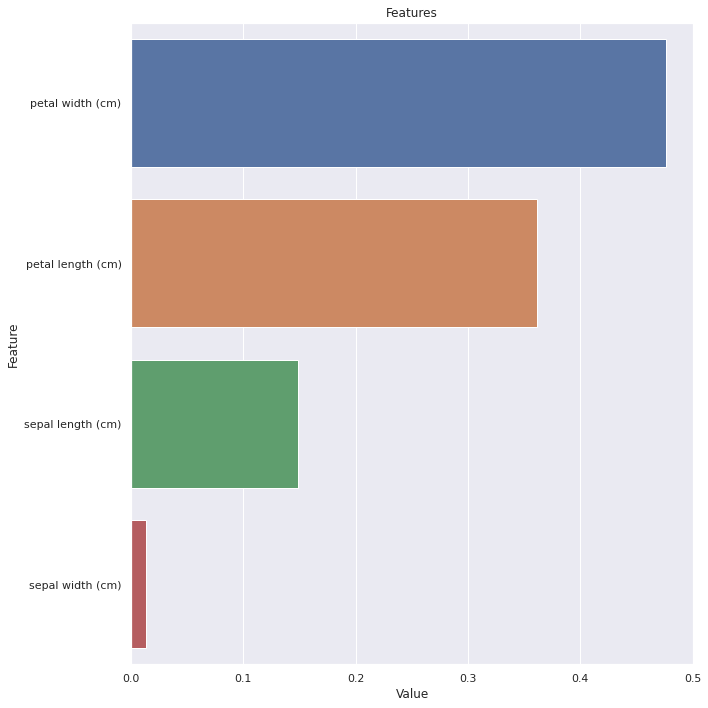

In [6]:
def plot_importance(model, features, num=len(data), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rfc, data)

# 3. Partial Dependence Plots

Partial Dependence describes the marginal impact of a feature on model prediction, holding other features in the model constant. The derivative of partial dependence describes the impact of a feature (analogous to a feature coefficient in a regression model). The partial dependence plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. PDPs can show if the relationship between the target and a feature is linear, monotonic or more complex. The partial dependence plot is a global method: The method takes into account all instances and makes a statement about the global relationship of a feature with the predicted outcome.

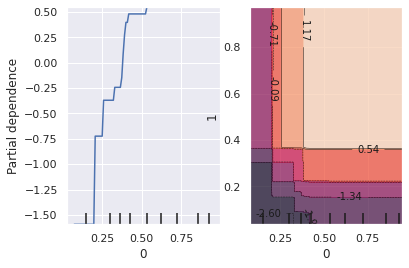

In [7]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor


X, y = make_friedman1()
clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
PartialDependenceDisplay.from_estimator(clf, X, [0, (0, 1)])
plt.show()

# 4. Explain Like I'm 5

In [8]:
# Reading in the data
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Creating the target and the features column and splitting the dataset into test and train set.

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
import eli5
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train.values,y_train.values)

y_pred = rfc.predict(X_test.values)

classification report :               precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.56      0.63        62

    accuracy                           0.79       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192



<AxesSubplot:>

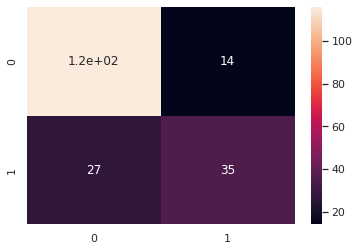

In [12]:
# Making the Confusion Matrix
clf_rpt = classification_report(y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [13]:
eli5.show_weights(rfc)

Weight,Feature
0.2414 ± 0.1406,x1
0.1712 ± 0.1066,x5
0.1442 ± 0.0886,x7
0.1296 ± 0.0752,x6
0.0882 ± 0.0554,x2
0.0777 ± 0.0509,x0
0.0756 ± 0.0639,x4
0.0722 ± 0.0525,x3


In [14]:
columns = X_test.columns.tolist()
eli5.show_weights(rfc, feature_names = columns)

Weight,Feature
0.2414 ± 0.1406,Glucose
0.1712 ± 0.1066,BMI
0.1442 ± 0.0886,Age
0.1296 ± 0.0752,DiabetesPedigreeFunction
0.0882 ± 0.0554,BloodPressure
0.0777 ± 0.0509,Pregnancies
0.0756 ± 0.0639,Insulin
0.0722 ± 0.0525,SkinThickness


In [15]:
import random
rand = random.randint(1, len(X_test))
print("Actual Target Value : ", y_test.values[rand])

eli5.show_prediction(rfc, X_test.values[rand], feature_names=columns, show_feature_values=True)

Actual Target Value :  0


# 5. Local Interpretable Model-agnostic Explanations (LIME)

LIME is a novel algorithm designed by Riberio Marco, Singh Sameer, Guestrin Carlos to access the behavior of the any base estimator(model) using local interpretable surrogate models (e.g. linear classifier/regressor). Such form of comprehensive evaluation helps in generating explanations which are locally faithful but may not align with the global behavior. Basically, LIME explanations are based on local surrogate models. These, surrogate models are interpretable models (like a linear model or decision tree) that are learned on the predictions of the original black box model. But instead of trying to fit a global surrogate model, LIME focuses on fitting local surrogate models to explain why single predictions were made.

In [16]:
import lime
import lime.lime_tabular

In [17]:
predict_fn_rf = lambda x: rfc.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['1','0'],kernel_width=5)

In [18]:
print(X_test.iloc[18])
print(y_test.iloc[18])

Pregnancies                   4.000
Glucose                     132.000
BloodPressure                86.000
SkinThickness                31.000
Insulin                       0.000
BMI                          28.000
DiabetesPedigreeFunction      0.419
Age                          63.000
Name: 479, dtype: float64
0


In [19]:
choosen_instance = X_test.iloc[18]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf, num_features=10)
exp.show_in_notebook(show_all=False)

# 6. Shapley Values and SHapley Additive exPlanations (SHAP)

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on what they claim.SHAP is an excellent model interpretation framework which is based on adaptation and enhancements to Shapley values which we shall explore in-depth in this section.

In [20]:
# Load and preview data
df = pd.read_csv('../input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
# Imputing missing values in total_bedrooms by median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [22]:
# now check for missing values in total bedrooms
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
# Declare feature vector and target variable
X = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
y = df['median_house_value']

In [24]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68126.3666645792

In [28]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [29]:
# Look at the 101st individual and the explanation of values
shap.force_plot(explainer.expected_value, shap_values[100,:], X.iloc[100,:])

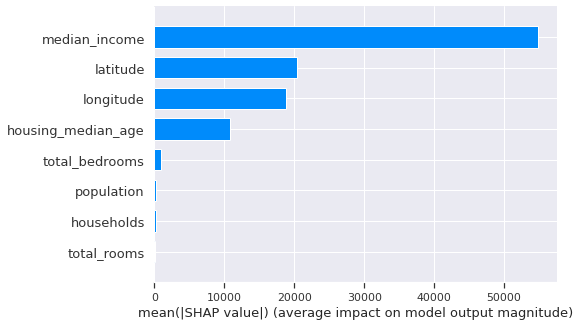

In [30]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

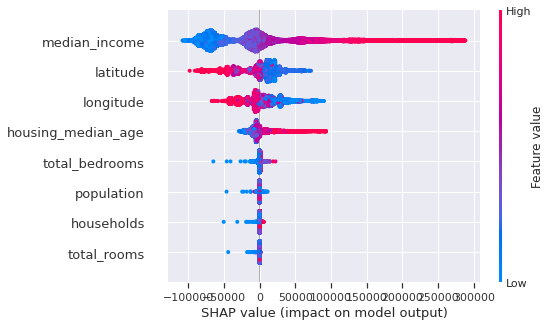

In [31]:
shap.summary_plot(shap_values, X_train)

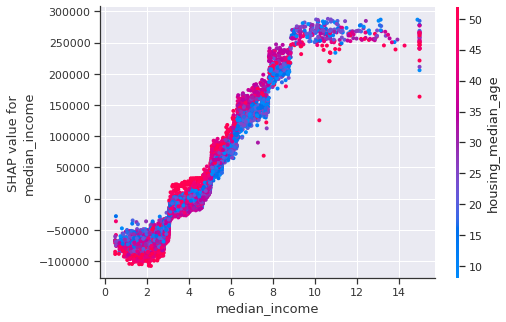

In [32]:
shap.dependence_plot('median_income', shap_values, X_train)

# 7. YellowBrick Visualization

In [33]:
import yellowbrick as yb

In [34]:
df = pd.read_csv("../input/kepler-exoplanet-search-results/cumulative.csv")
df.dropna()
X = (df.iloc[:, 5:].assign(koi_pdisposition=(df.koi_pdisposition == "CANDIDATE").astype(int)).drop(columns=['koi_tce_delivname']))
y = df.koi_disposition == "CONFIRMED"

df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


**7.1 Rank1D**

p-value may not be accurate for N > 5000.


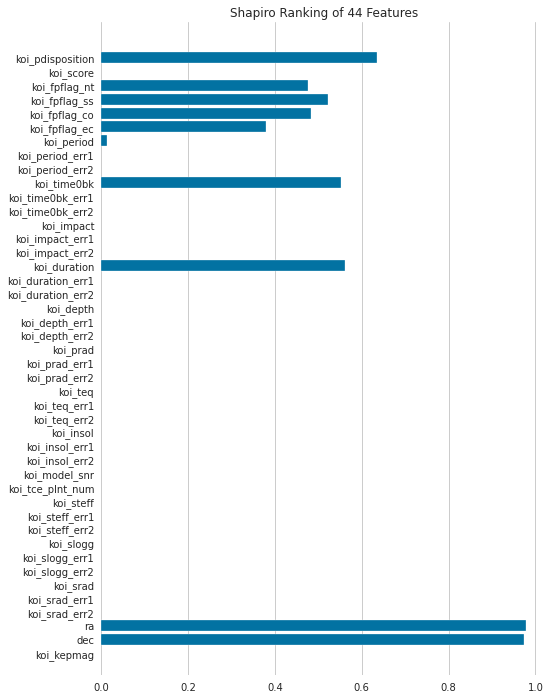

<AxesSubplot:title={'center':'Shapiro Ranking of 44 Features'}>

In [35]:
from yellowbrick.features import Rank1D

fig, ax = plt.subplots(1, figsize=(8, 12))
vzr = Rank1D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

**7.2. Rank2D Visualization**

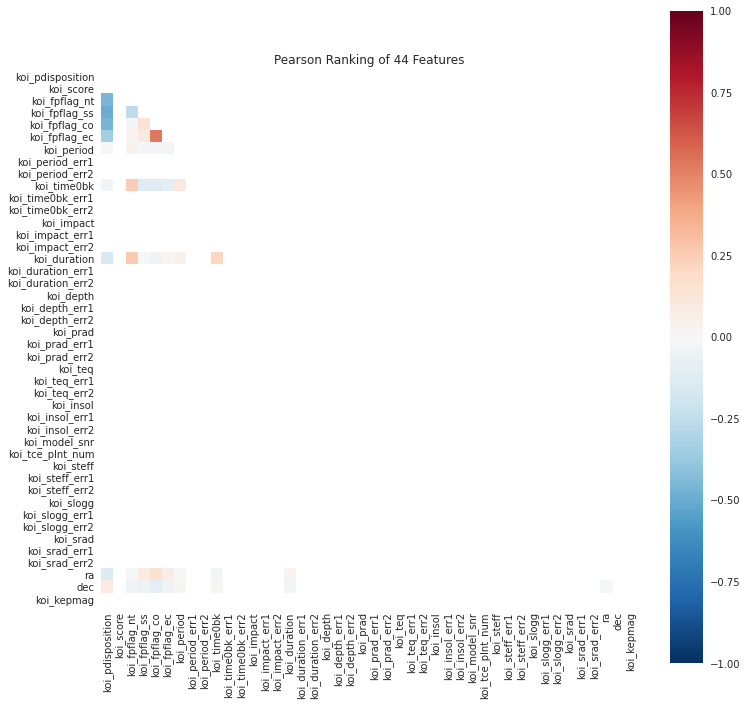

<AxesSubplot:title={'center':'Pearson Ranking of 44 Features'}>

In [36]:
from yellowbrick.features import Rank2D

fig, ax = plt.subplots(1, figsize=(12, 12))
vzr = Rank2D(ax=ax)
vzr.fit(X, y)
vzr.transform(X)
sns.despine(left=True, bottom=True)
vzr.poof()

**7.3. Parallel Coordinates**

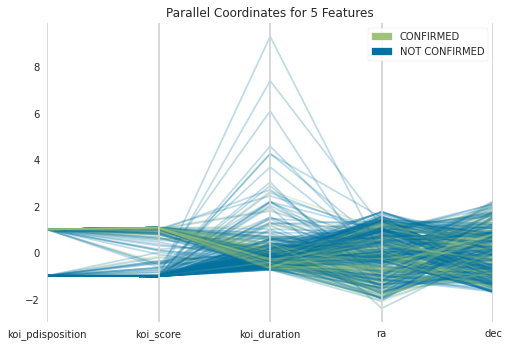

<AxesSubplot:title={'center':'Parallel Coordinates for 5 Features'}>

In [37]:
from yellowbrick.features import ParallelCoordinates
from sklearn.preprocessing import StandardScaler

# Select a handful of relevant columns and drop nulls.
np.random.seed()
cols = ['koi_pdisposition', 'koi_score', 'koi_duration', 'ra', 'dec']
X_sample = X.sample(500).loc[:, cols].dropna()
y_sample = y.iloc[X_sample.index.values].reset_index(drop=True)

# Normalize all of the fields.
trans = StandardScaler()
trans.fit(X_sample)
X_sample = pd.DataFrame(trans.transform(X_sample), columns=cols)

# Fit the chart.
# fig, ax = plt.subplots(1, figsize=(12, 6))
kwargs = {'vlines_kwds': {'color': 'lightgray'}}
vzr = ParallelCoordinates(classes=['NOT CONFIRMED', 'CONFIRMED'], **kwargs)  # ax=ax
vzr.fit(X_sample, y_sample)
vzr.transform(X_sample)
sns.despine(left=True, bottom=True)

# Display.
vzr.poof()

**7.4. RadViz Visualization**

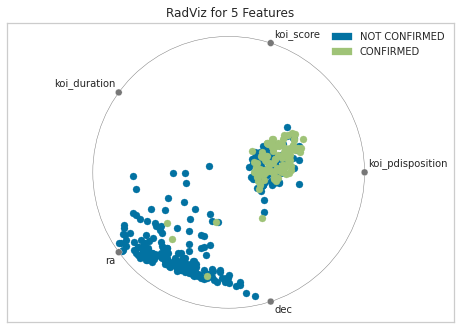

<AxesSubplot:title={'center':'RadViz for 5 Features'}>

In [38]:
from yellowbrick.features import RadViz

# fig, ax = plt.subplots(1, figsize=(12, 6))
# cmap = y_sample.map(lambda v: "steelblue" if v else "lightgray")
vzr = RadViz(classes=['NOT CONFIRMED', 'CONFIRMED'])
vzr.fit_transform(X_sample, y_sample)
vzr.poof()

**7.6. Feature Importances**

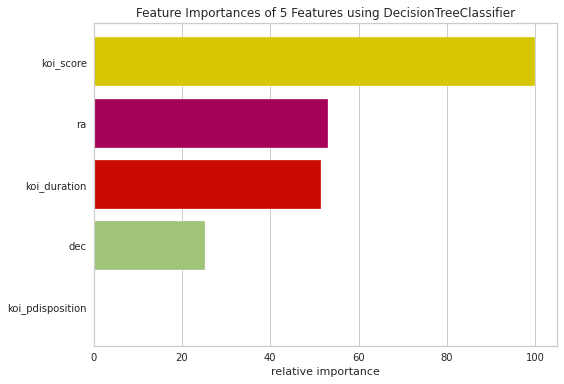

<AxesSubplot:title={'center':'Feature Importances of 5 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [39]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances

clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X_sample, y_sample)
viz.poof()

# MLXTEND Visualization

In [40]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

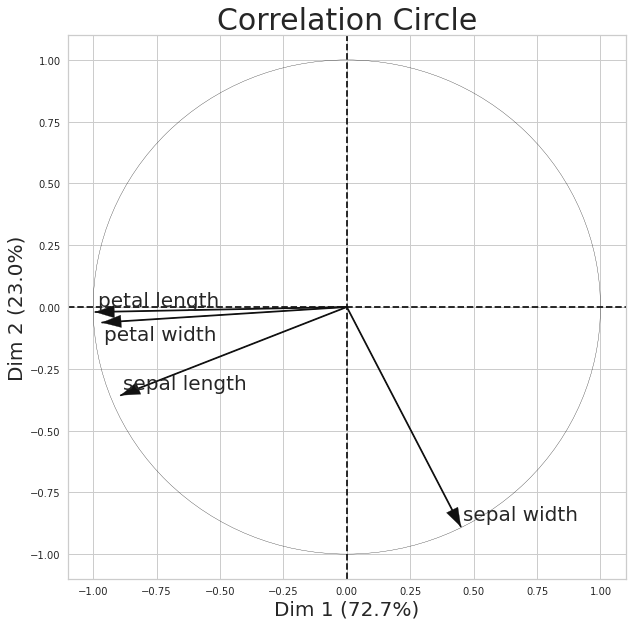

In [41]:
X, y = iris_data()

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)


1st Principal Component explains 72.7% of the total variance, while 2nd Principal Component explains 23.0%